In [1]:
# Implementing the Random Forest Regressor model

In [ ]:
pip install scikit-learn

In [2]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from IPython.display import HTML, display

In [6]:
directory = './caltech_model_data'

In [ ]:
# Load and combine all CSV files into a single dataframe with stationID

In [7]:
combined_data = pd.DataFrame()

In [8]:
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        # Extract stationID from filename (assuming filename contains stationID, e.g., 'station123.csv')
        station_id = filename.split('.')[0]  # Modify this line based on actual filename format
        # Load the data
        data = pd.read_csv(filepath)
        # Add stationID column
        data['stationID'] = station_id
        combined_data = pd.concat([combined_data, data], axis=0)

In [7]:
# Convert the 'Month' column to datetime format and set it as the index

In [9]:
combined_data['Month'] = pd.to_datetime(combined_data['month'])
combined_data.set_index('Month', inplace=True)

In [9]:
# Load the weather data

In [10]:
weather_data = pd.read_csv('./caltech_weather_monthly_data/monthly_weather_data.csv')

In [11]:
# Convert the date column in weather data to datetime format and set it as the index

In [12]:
weather_data['Date'] = pd.to_datetime(weather_data['month'])
weather_data.set_index('Date', inplace=True)

In [13]:
# Merge the charging station data with the weather data

In [15]:
merged_data = combined_data.merge(weather_data, left_index=True, right_index=True, how='left')

In [ ]:
# Handle missing values

In [16]:
merged_data.fillna(method='ffill', inplace=True)
merged_data.dropna(inplace=True)

In [ ]:
# Select the features and target variable

In [17]:
features = merged_data.columns.difference(['kWhDelivered', 'stationID','siteID', 'timezone','spaceID','month_x', 'Date', 'Month', 'month_y'])
target =  'kWhDelivered'

# Create feature and target datasets
X = merged_data[features]
y = merged_data[target]

print(merged_data[features])

            AvgHumidity_x  AvgHumidity_y  AvgPrecipitation_x  \
Month                                                          
2018-05-01      56.451613      56.451613            0.006855   
2018-05-01      56.451613      56.451613            0.006855   
2018-05-01      56.451613      56.451613            0.006855   
2018-05-01      56.451613      56.451613            0.006855   
2018-05-01      56.451613      56.451613            0.006855   
...                   ...            ...                 ...   
2019-03-01      52.427419      52.427419            0.095565   
2019-03-01      52.427419      52.427419            0.095565   
2019-03-01      52.427419      52.427419            0.095565   
2019-03-01      52.427419      52.427419            0.095565   
2019-03-01      52.427419      52.427419            0.095565   

            AvgPrecipitation_y  AvgTemp_x  AvgTemp_y  AvgWindSpeed_x  \
Month                                                                  
2018-05-01            0

In [88]:
# Split data into training and testing sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [74]:
# Scale the features

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a RandomForest model (as an example)

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions

In [21]:
predictions = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model

In [22]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 17135.988825751178
Mean Absolute Error: 103.39390670304633


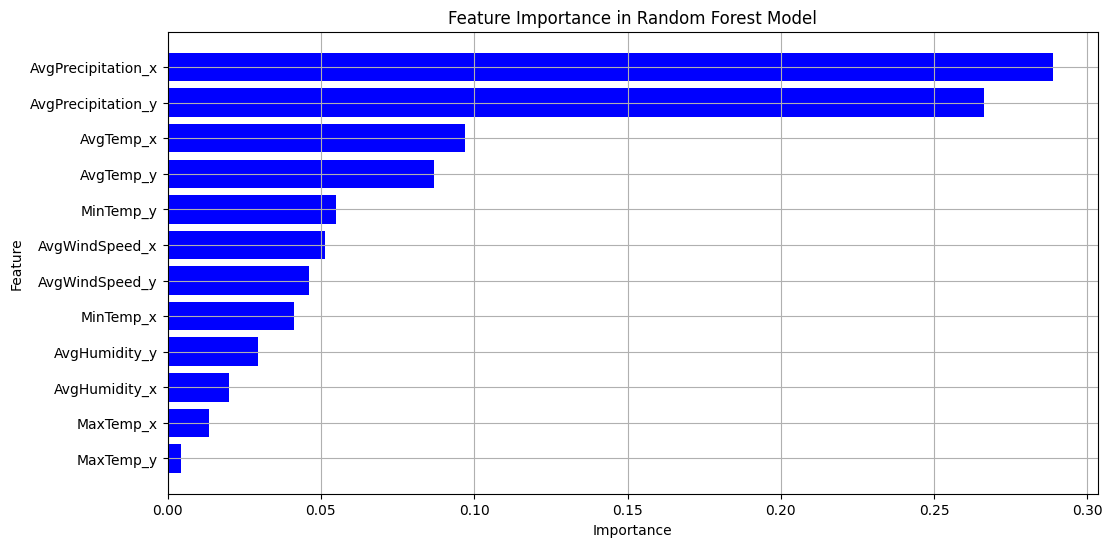

In [114]:
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='b')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.grid(True)
plt.show()


In [23]:
display(HTML("""<h2>Model Parameters:</h2>"""))
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
